## Diffusion lengthscale

Toy model of 1-D diffusion of a linear concentration profile through two layers with different diffusivities. 

Based on lesson 3 of Lorena Barba's CFD Python: 12 Steps to Navier-Stokes (http://lorenabarba.com/blog/cfd-python-12-steps-to-navier-stokes/).

We discretize the 1-D diffusion equation

$$\frac{\partial C}{\partial t} = \kappa \frac{\partial^2 C}{\partial z^2}$$

as

$$\frac{C_i^{n+1}-C_i^{n}}{\Delta t}=\kappa \frac{C_{i+1}^n-2C_i^n+C_{i-1}^n}{\Delta z^2},$$

using forward differences for time and central differences for the spatial derivative.

So, we calculate the concentration at time step n+1 as

$$C_i^{n+1}=\frac{\kappa \Delta t}{\Delta z^2}(C_{i+1}^n-2C_i^n+C_{i-1}^n) + C_i^{n}$$.

I will cheat a litle bit because I will make $\kappa$ variable in time so it should be inside the spatial derivative. Let's see if I can get away with it because it will be a step.


In [17]:
import numpy as np               
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [18]:
# Plots appearance
sns.set_context('notebook')
sns.set_style('whitegrid')

In [137]:
def timestepping(IC, kappa, dt, dz, nt):
    '''Iterate for nt timesteps the solution to the diffusion equation
    INPUT
    IC: vector with the initial condition (1D numpy array)
    kappa: 1D numpy array, same size as u
    dt: timestep size (scalar)
    dz: depth of cells (scalar)
    nt: number of timesteps
    
    OUTPUT
    u: 1d numpy array with concentrations after nt timesteps.
    '''
    un = np.ones(nz) #our placeholder array, un, to advance the solution in time
    u = np.ones(nz) #our placeholder array, un, to advance the solution in time
    u = IC.copy()
    
    for n in range(nt):  #iterate through time
        un = u.copy() ##copy the existing values of u into un
        for i in range(1, nz - 1):
            u[i] = un[i] + kappa[i] * dt / dz**2 * (un[i+1] - 2 * un[i] + un[i-1])
    return u

def plotICs(IniC,kappa,L,nz):
    '''Plots initial conditions and diffusivity profile, creates figure inside and returns fig and ax handles'''
    fig,(ax1,ax2) = plt.subplots(1,2,sharey = True,figsize=(8,3))

    ax1.plot(IniC, np.linspace(0, L, nz))
    ax1.set_xlabel('Concentration ($\mu M$)')
    ax1.set_ylabel('Depth (m)')
    ax1.set_title('Initial concentration')

    ax2.plot(kappa,np.linspace(0, L, nz))
    ax2.set_xlabel('$\kappa$ (m$^2$s$^{-1}$)')
    ax2.set_title('Diffusivity profile')
    ax2.invert_yaxis()
    
    return(fig,ax1,ax2)

def plotC(ax, C, L, nz):
    '''Plots concentration over an existing ax and returns ax handle and line handle'''
    line, = ax.plot(C, np.linspace(0, L, nz));
    ax.set_xlabel('Concentration ($\mu M$)')
    ax.set_ylabel('Depth (m)')
    return (line)

In [204]:
# INITIALIZATION 

# Space
nz = 100           # number of points in z
L = 100            # total depth (m)
dz = L / (nz - 1)  # vertical spacing (m)

# Time
nt = 44440         # number of timesteps we want to calculate
sigma = .2         #sigma is a parameter, we'll learn more about it later
#dt = sigma * dz**2 / kappa_bg #dt is defined using sigma ... more later!
dt = 60  # time step (s)
to_day = dt/(3600*24)

# Diffusivity
kappa_bg = 1E-5              # background diffusivity
kappa_can = 1E-3             # canyon diffusivity
kappa = np.ones(nz)*kappa_bg # Diffuisivity profile
kappa[int(nz/2):] = kappa_can

# Talk to me
print('The time step is %1.1f seconds' %dt)
print('The vertical resolution is %1.3f meters' %dz)

The time step is 60.0 seconds
The vertical resolution is 1.010 meters


## Hat profile

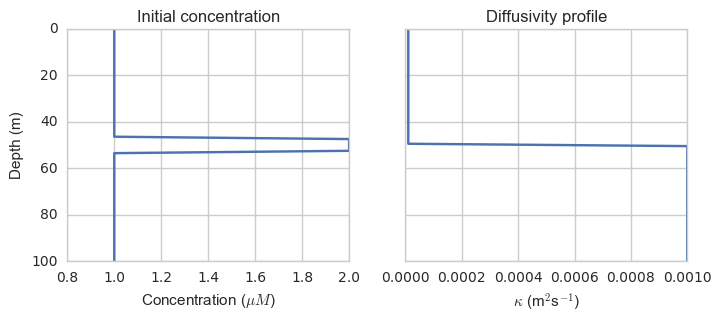

In [205]:
# Initial conditon
IC = np.ones(nz)     
IC[int(nz/2)-3:int(nz/2)+3] = 2  # It's a hat 

fig, ax1, ax2 = plotICs(IC,kappa,L,nz)

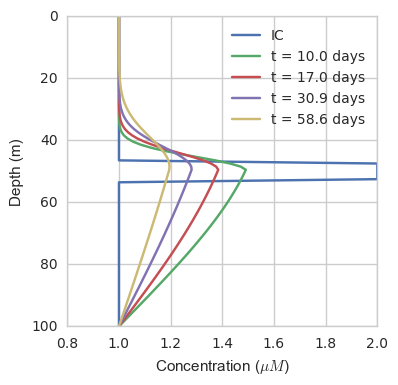

In [211]:
# PLOT RESULTING CONCENTRATION

fig, ax = plt.subplots(1,1, figsize=(4,4))
l1 = plotC(ax, IC, L, nz)
lines = [l1]

times = [14440,24440,44440,84440]
for time in times:
    conc = timestepping(IC, kappa, dt, dz, time)
    l2 = plotC(ax, conc, L, nz)
    lines.append(l2)

ax.invert_yaxis()
ax.legend((lines), ('IC', 't = %1.1f days' %(times[0]*to_day),'t = %1.1f days' %(times[1]*to_day),
                     't = %1.1f days' %(times[2]*to_day),'t = %1.1f days'%(times[3]*to_day))) 

## Parabolic profile

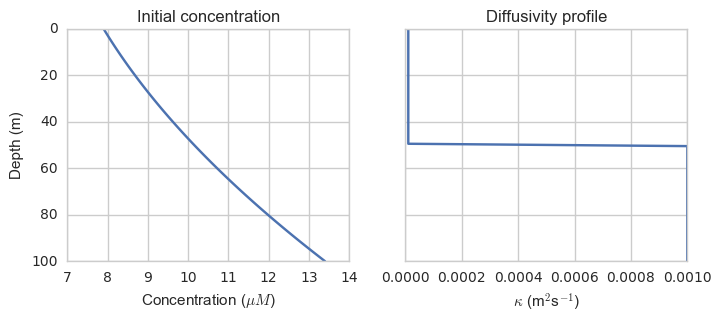

In [193]:
# Initial conditon
IC = np.ones(nz)
for ii in range(nz):
    IC[ii]=0.0002*(ii*dz)**2+0.035*ii*dz+7.9

fig, ax1, ax2 = plotICs(IC,kappa,L,nz)

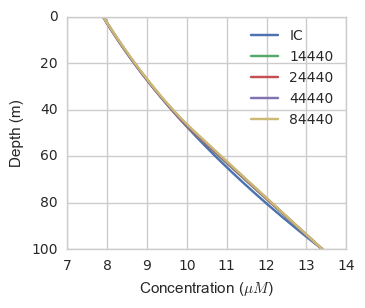

In [202]:
# PLOT RESULTING CONCENTRATION

fig, ax = plt.subplots(1,1, figsize=(4,4))
l1 = plotC(ax, IC, L, nz)
lines = [l1]

times = [14440,24440,44440,84440]
for time in times:
    conc = timestepping(IC, kappa, dt, dz, time)
    l2 = plotC(ax, conc, L, nz)
    lines.append(l2)

ax.invert_yaxis()
ax.legend((l1, l2), ('IC', 't = %1.1f days','t = %1.1f days','t = %1.1f days','t = %1.1f days' 
                     %((times[0]*to_day),(times[1]*to_day),(times[2]*to_day),(times[3]*to_day)))

## Linear profile

In [ ]:
nt = 44440

# Initial conditon
IC = np.ones(nz)
for ii in range(nz):
    IC[ii]=0.035*ii*dz+7.9
    
fig, ax1, ax2 = plotICs(IC,kappa,L,nz)